# Naive Bayes Classifier for Text Data

<img src="https://media.giphy.com/media/dQpUkK59l5Imxsh8jN/giphy.gif" width=300 > 

#### Multinomial Naive Bayes
- Important is to compute the likelihood 

$$P(x_i|Y_i = c) = \frac {count(x_i, Y_i = c)} {\sum_{w \in V}{count(w, Y_i=c)}} $$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(legacy='1.25')
import json
import pprint

# Laplace Smoothing

<img src="https://media.giphy.com/media/SqmkZ5IdwzTP2/giphy.gif" width=300 align=left>

$$P(x_i|Y_i = c) = \frac {count(x_i, Y_i = c) + \alpha} {\sum_{w \in V}{count(w, Y_i=c)} + \alpha |V|} $$

# A Practical Example of Multinomial Naive Bayes

<table align=left>
    <tr style="font-weight:bold;">
        <td></td>
        <td>docID</td>
        <td>words in document</td>
        <td>c = China?</td>
    </tr> 
    <tr>
        <td  rowspan=4> training set </td>
        <td> 1 </td>
        <td> Chinese Beijing Chinese </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> Chinese Chinese Shanghai </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> Chinese Macao </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td> Tokyo Japan Chinese </td>
        <td> no </td>
    </tr>
    <tr>
        <td> test set </td>
        <td> 5 </td>
        <td> Chinese Chinese Chinese Tokyo Japan </td>
        <td> ? </td>
    </tr>
</table>

# Bernoulli Naive Bayes

<img src="https://media.giphy.com/media/xTiN0h0Kh5gH7yQYUw/giphy.gif" width=300 align=right>
<br><br>

1. Bernoulli doesn't talk about the frequency of a feature/word.
1. It is only concerned about whether a word is present or not (1 or 0).

**Likelihood :**

$$P(x_i|Y_i = c) = \frac {count(d_i \; contains \; x_i, Y_i = c) + \alpha} {{count(Y_i=c)} + 2.\alpha \, } $$

**Prediction:**

$$P(Y=1|X) = \prod_{i=1}^{|V|} { P(x_i|Y=1)^b . \big(1 - P(x_i|Y=spam)\big)^{1-b}} * P(Y=1)$$

## Example of Bernoulli Naive Bayes

<table align=left>
    <tr style="font-weight:bold;">
        <td></td>
        <td>docID</td>
        <td>words in document</td>
        <td>c = China?</td>
    </tr> 
    <tr>
        <td  rowspan=4> training set </td>
        <td> 1 </td>
        <td> Chinese Beijing Chinese </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> Chinese Chinese Shanghai </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> Chinese Macao </td>
        <td> yes </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td> Tokyo Japan Chinese </td>
        <td> no </td>
    </tr>
    <tr>
        <td> test set </td>
        <td> 5 </td>
        <td> Chinese Chinese Chinese Tokyo Japan </td>
        <td> ? </td>
    </tr>
</table>

# Bias Variance Tradeoff   <img src="imgs/alpha.png" width=100 >

# Gaussian Naive Bayes
<img src="imgs/gaussian.png" width=500>

# Scikit Learn code for Naive Bayes

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target

In [12]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
X.shape

(1797, 64)

In [14]:
y.shape

(1797,)

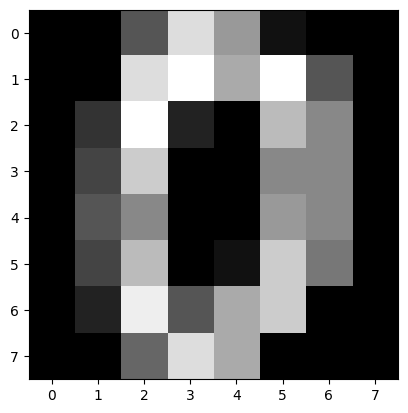

In [16]:
plt.imshow(X[0].reshape(8,8), cmap="gray")

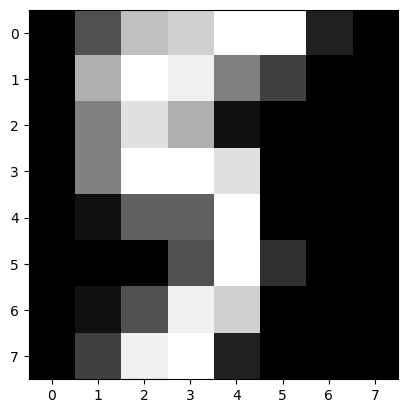

In [17]:
plt.imshow(X[15].reshape(8,8), cmap="gray")

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [21]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [23]:
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [24]:
bnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [25]:
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [26]:
mnb.score(X_test, y_test)

0.9111111111111111

In [27]:
bnb.score(X_test, y_test)

0.8638888888888889

In [28]:
gnb.score(X_test, y_test)

0.8472222222222222